In [2]:
# Import packages
import cv2
import sys

import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline

## This is the main code
It works quite nicely, but we will try bit harder to come up with nice tracking. Afterwards we return to this code and try to make it better.

In [4]:
if __name__ == '__main__' :
 
    # Set up tracker.
    # Instead of MIL, you can also use
    # BOOSTING, KCF, TLD, MEDIANFLOW or GOTURN
     
    tracker = cv2.TrackerMIL_create()
 
    # Read video
    video = cv2.VideoCapture("videos/seagull.mp4")
 
    # Exit if video not opened.
    if not video.isOpened():
        print ("Could not open video")
        sys.exit()
 
    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print ('Cannot read video file')
        sys.exit()
     
    #Define an initial bounding box
    bbox = (126, 23, 188, 164)
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # Uncomment the line below to select a different bounding box
    # bbox = cv2.selectROI("Tracking", frame, fromCenter = False, showCrosshair = False)
 
    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)
     
    i = 0;
    frame_avg = np.zeros_like(frame)
    while True:
        
        while i <= 5:
            # Read a new frame
            ok, frame = video.read()
            if not ok or frame is None:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_avg += frame
            i += 1
            
            
        frame = frame_avg / i
        frame = frame.astype(np.uint8)
        i = 0
         
        # Update tracker
        ok, bbox = tracker.update(frame)
 
        # Draw bounding box
        if ok:
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (0,0,255))
 
        # Display result
        cv2.imshow("Tracking", frame)
 
        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27 : break
    cv2.destroyAllWindows()

C:\Users\MartinH.PHARPCMORPHWK1\Miniconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\MartinH.PHARPCMORPHWK1\Miniconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

## Improve tracking
Let's take the 

In [ ]:
cv2.Tracker

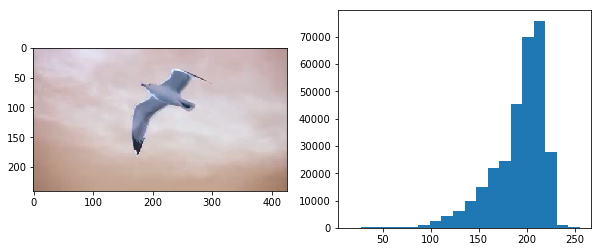

In [2]:
# Read video
video = cv2.VideoCapture("videos/seagull.mp4")
# Read first frame.
ok, frame = video.read()

# Check histogram to see if you can threshold
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 4))
ax1.imshow(frame, cmap = 'bone')
_ = ax2.hist(frame.ravel(), 20)

In [3]:
bbox = cv2.selectROI("Tracking", frame, fromCenter = False, showCrosshair = False)
cv2.destroyAllWindows()

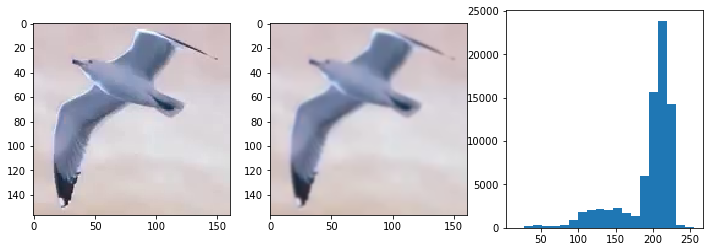

In [21]:
from skimage.filters import gaussian
frame_roi = frame[bbox[1]: int(bbox[1] + bbox[3]), bbox[0]: int(bbox[0] + bbox[2])]
frame_roi_filt = gaussian(frame_roi, sigma = 1, multichannel = True)
# Check histogram to see if you can threshold
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 4))
ax1.imshow(frame_roi)
ax2.imshow(frame_roi_filt)
_ = ax3.hist(frame_roi.ravel(), 20)

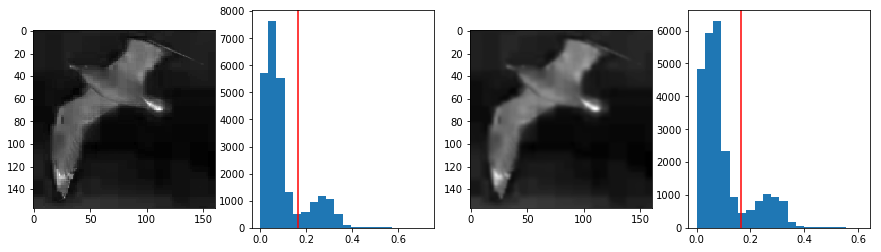

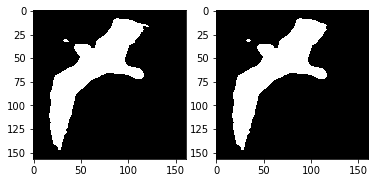

In [48]:
from skimage.color import convert_colorspace
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
from skimage.morphology import binary_closing, binary_opening

frame_hsv = convert_colorspace(frame, "RGB", "HSV")
frame_roi = frame_hsv[bbox[1]: int(bbox[1] + bbox[3]), bbox[0]: int(bbox[0] + bbox[2]), 1]
frame_roi_filt = gaussian(frame_roi, sigma = 1, multichannel = False)

thresh = threshold_otsu(frame_roi_filt);
binary = frame_roi_filt > thresh

# Check histogram to see if you can threshold
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (15, 4))
ax1.imshow(frame_roi, cmap = 'gray')
_ = ax2.hist(frame_roi.ravel(), 20)
ax2.axvline(thresh, color='r')
ax3.imshow(frame_roi_filt, cmap = 'gray')
_ = ax4.hist(frame_roi_filt.ravel(), 20)
ax4.axvline(thresh, color='r')
n

binary_open = binary_opening(binary)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (6, 4))
ax1.imshow(binary, cmap=plt.cm.gray)
ax2.imshow(binary_open, cmap=plt.cm.gray)

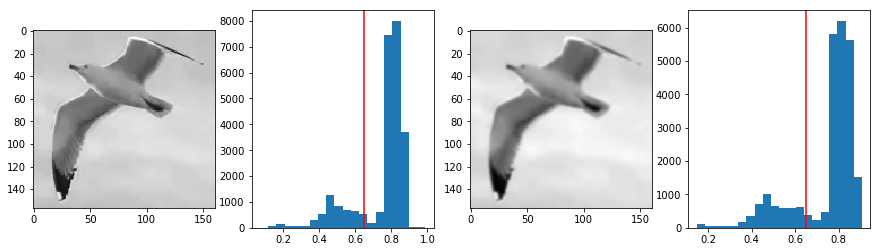

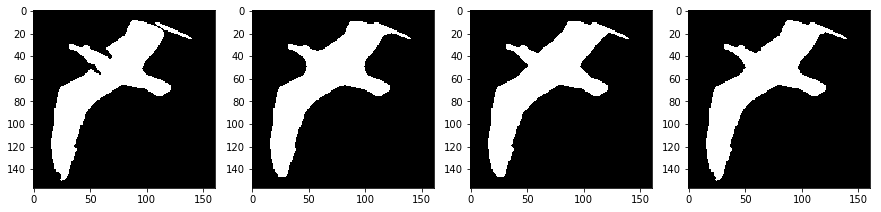

In [60]:
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
from skimage.morphology import binary_closing, disk, diamond, square, star

frame_gray = rgb2gray(frame)
frame_roi = frame_rgb[bbox[1]: int(bbox[1] + bbox[3]), bbox[0]: int(bbox[0] + bbox[2])]

frame_roi_filt = gaussian(frame_roi, sigma = 1, multichannel = False)

thresh = threshold_otsu(frame_roi_filt);
binary = frame_roi_filt < thresh

# Check histogram to see if you can threshold
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (15, 4))
ax1.imshow(frame_roi, cmap = 'gray')
_ = ax2.hist(frame_roi.ravel(), 20)
ax2.axvline(thresh, color='r')
ax3.imshow(frame_roi_filt, cmap = 'gray')
_ = ax4.hist(frame_roi_filt.ravel(), 20)
ax4.axvline(thresh, color='r')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (15, 4))
ax1.imshow(binary, cmap=plt.cm.gray)

selem = disk(10)
binary_closed = binary_closing(binary, selem)
ax2.imshow(binary_closed, cmap=plt.cm.gray)

selem = diamond(10)
binary_closed = binary_closing(binary, selem)
ax3.imshow(binary_closed, cmap=plt.cm.gray)

# selem = square(10)
# binary_closed = binary_closing(binary, selem)
# ax4.imshow(binary_closed, cmap=plt.cm.gray)

selem = star(4)
binary_closed = binary_closing(binary, selem)
ax4.imshow(binary_closed, cmap=plt.cm.gray)

Ok, it looks like the star does a nice job. We can now find center of mass of the object:

In [67]:
selem = diamond(10)
binary_closed = binary_closing(binary, selem)

from skimage.measure import label, regionprops

binary_label = label(binary_closed)
binary_props = regionprops(binary_label)

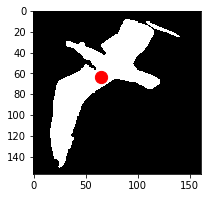

In [75]:
fig, ax1 = plt.subplots(1,1, figsize = (3, 4))
ax1.imshow(binary, cmap=plt.cm.gray)
ax1.scatter(binary_props[0].centroid[0], binary_props[0].centroid[1], s = 150, c = 'red', marker = 'o')